In [ ]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 7.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 12.8MB 220kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 296kB 7.5MB/s 


In [ ]:
!wget https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1 -O erm.zip

--2021-03-08 18:12:45--  https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qrdswgzv63o3opg/datasetCorregido.zip [following]
--2021-03-08 18:12:45--  https://www.dropbox.com/s/dl/qrdswgzv63o3opg/datasetCorregido.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e3651dab839988019cfb8fe35.dl.dropboxusercontent.com/cd/0/get/BKSoEDwrL1BoDTBhfqk7DohaXcIQtjG6SKDo6kOPjxL4-hz2XpzNvVEIv7aN8t1aXU-dJMi4kqy97CnSq5NV5WBx_s1h-NRys1S4q3ohsUtCkDoH8S7MpeGSTCuHRSVzZZCZ8MiweW4kkX93opzzpMKT/file?dl=1# [following]
--2021-03-08 18:12:46--  https://uc8e3651dab839988019cfb8fe35.dl.dropboxusercontent.com/cd/0/get/BKSoEDwrL1BoDTBhfqk7DohaXcIQtjG6SKDo6kOPjxL4-hz2XpzNvVEIv7aN8t1a

In [ ]:
!unzip erm.zip

Archive:  erm.zip
   creating: datasetCorregido/
   creating: datasetCorregido/train/
   creating: datasetCorregido/train/no/
  inflating: datasetCorregido/train/no/anonymized_482127.jpg  
  inflating: datasetCorregido/train/no/anonymized_174749.jpg  
  inflating: datasetCorregido/train/no/anonymized_734047.jpg  
  inflating: datasetCorregido/train/no/anonymized_581767.jpg  
  inflating: datasetCorregido/train/no/anonymized_1400777.jpg  
  inflating: datasetCorregido/train/no/anonymized_347431.jpg  
  inflating: datasetCorregido/train/no/anonymized_626433.jpg  
  inflating: datasetCorregido/train/no/anonymized_1372303.jpg  
  inflating: datasetCorregido/train/no/anonymized_1324599.jpg  
  inflating: datasetCorregido/train/no/anonymized_196853.jpg  
  inflating: datasetCorregido/train/no/anonymized_687000.jpg  
  inflating: datasetCorregido/train/no/anonymized_504041.jpg  
  inflating: datasetCorregido/train/no/anonymized_1414333.jpg  
  inflating: datasetCorregido/train/no/anonymized_3

In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import torch
torch.cuda.set_device(1)

In [2]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [3]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=360,max_warp=0,max_zoom=1.1,
                      max_lighting=0.1,p_lighting=0.5), Normalize.from_stats(*imagenet_stats)])

In [4]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=16)

In [5]:
from fastai.vision.all import *
import timm
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18')
]

In [6]:
modelo=timm.models.hrnet.hrnet_w48(num_classes=2)

In [7]:
lr=1e-4

## Ranger

In [8]:
opt_func = partial(ranger, beta=0.99, eps=1e-6)

In [9]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=0.14454397559165955)

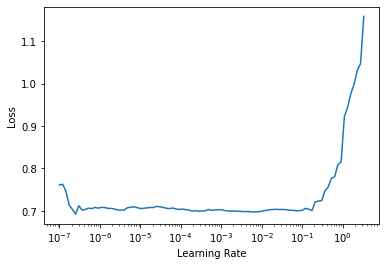

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.701036,0.700287,0.489297,0.485455,0.839623,01:25
1,0.696027,0.695445,0.489297,0.472028,0.424528,01:26


Better model found at epoch 0 with valid_loss value: 0.7002870440483093.


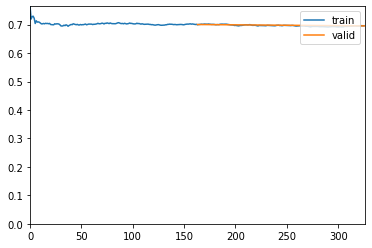

Better model found at epoch 1 with valid_loss value: 0.6954450011253357.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.696674,0.694598,0.487768,0.471761,0.446541,01:26
1,0.692838,0.694163,0.506116,0.490975,0.427673,01:26
2,0.692250,0.693900,0.510703,0.496094,0.399371,01:25
3,0.693635,0.694628,0.498471,0.482143,0.424528,01:26
4,0.695963,0.693099,0.513761,0.500000,0.317610,01:25
5,0.693440,0.693361,0.506116,0.490706,0.415094,01:25
6,0.692743,0.692793,0.515290,0.502415,0.327044,01:25
7,0.696066,0.692089,0.510703,0.495726,0.364780,01:26
8,0.690982,0.691727,0.513761,0.500000,0.327044,01:26
9,0.692724,0.691437,0.515290,0.501946,0.405660,01:25


Better model found at epoch 0 with valid_loss value: 0.6945977210998535.


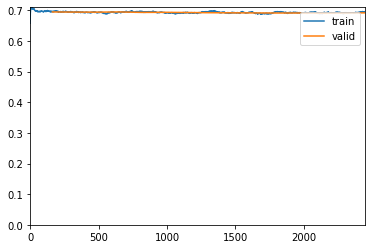

Better model found at epoch 1 with valid_loss value: 0.6941628456115723.
Better model found at epoch 2 with valid_loss value: 0.6939002871513367.
Better model found at epoch 4 with valid_loss value: 0.693098783493042.
Better model found at epoch 6 with valid_loss value: 0.6927931904792786.
Better model found at epoch 7 with valid_loss value: 0.6920890212059021.
Better model found at epoch 8 with valid_loss value: 0.691727340221405.
Better model found at epoch 9 with valid_loss value: 0.6914367079734802.
Better model found at epoch 10 with valid_loss value: 0.6911187767982483.
Better model found at epoch 11 with valid_loss value: 0.6911181807518005.
Better model found at epoch 12 with valid_loss value: 0.6905819773674011.


In [11]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [12]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

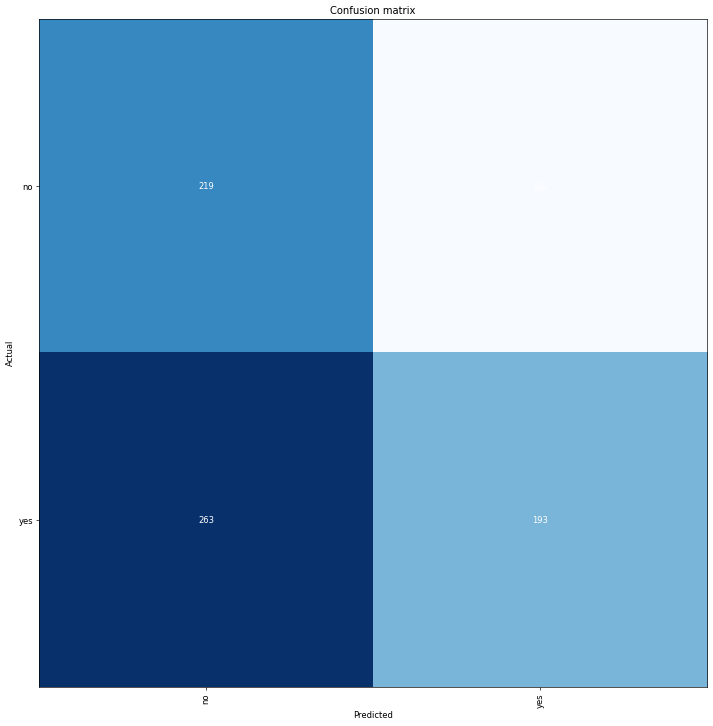

In [13]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [14]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5105328559875488.


(#4) [0.693381667137146,0.5105328559875488,0.5938461538461538,0.4232456140350877]

## Faltten

In [15]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.724105,0.740910,0.486239,0.486239,1.000000,01:22
1,0.705682,0.691037,0.515290,0.500800,0.984277,01:21


Better model found at epoch 0 with valid_loss value: 0.740909993648529.


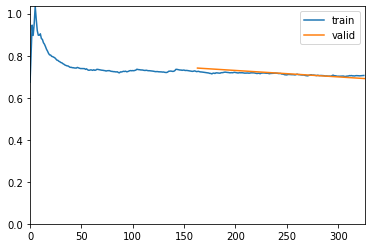

Better model found at epoch 1 with valid_loss value: 0.6910372972488403.


In [16]:
learn.fit_flat_cos(2,lr=1e-3)

In [17]:
learn.unfreeze()

SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=6.309573450380412e-07)

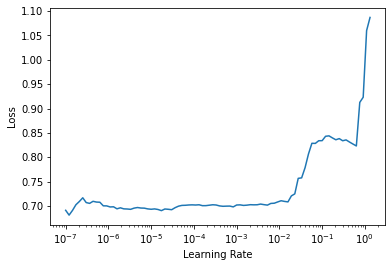

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.689169,0.693916,0.524465,0.527559,0.210692,01:21
1,0.683308,0.674078,0.587156,0.642857,0.339623,01:22
2,0.666697,0.666122,0.591743,0.624390,0.402516,01:22
3,0.662465,0.642321,0.629969,0.641791,0.540881,01:22
4,0.662333,0.640282,0.651376,0.708333,0.481132,01:22
5,0.624366,0.621268,0.657492,0.655629,0.622642,01:22
6,0.631214,0.628062,0.649847,0.607748,0.789308,01:22
7,0.622214,0.609588,0.680428,0.729958,0.544025,01:22
8,0.607898,0.584427,0.678899,0.695652,0.603774,01:22
9,0.581464,0.583065,0.686544,0.699647,0.622642,01:22


Better model found at epoch 0 with valid_loss value: 0.693915843963623.


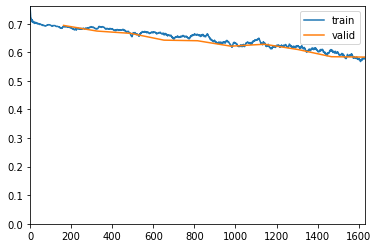

Better model found at epoch 1 with valid_loss value: 0.6740777492523193.
Better model found at epoch 2 with valid_loss value: 0.6661220192909241.
Better model found at epoch 3 with valid_loss value: 0.6423212289810181.
Better model found at epoch 4 with valid_loss value: 0.6402822136878967.
Better model found at epoch 5 with valid_loss value: 0.6212683916091919.
Better model found at epoch 7 with valid_loss value: 0.6095882654190063.
Better model found at epoch 8 with valid_loss value: 0.5844268798828125.
Better model found at epoch 9 with valid_loss value: 0.5830653309822083.


In [19]:
learn.fit_flat_cos(10,lr=1e-4)

In [20]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

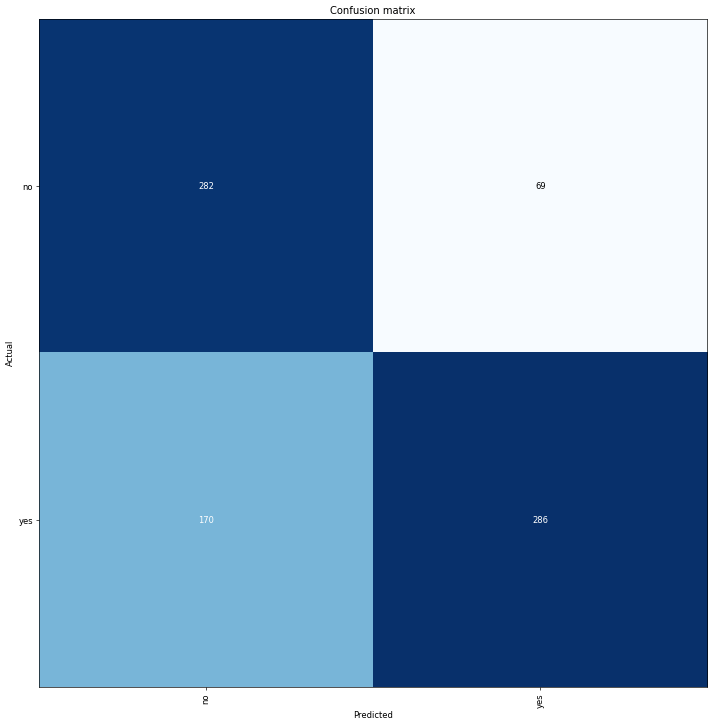

In [21]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [22]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7038413882255554.


(#4) [0.5691683888435364,0.7038413882255554,0.8056338028169014,0.6271929824561403]

## LabelSmoothing

In [23]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

SuggestedLRs(lr_min=2.7542287170945203e-07, lr_steep=1.3182567499825382e-06)

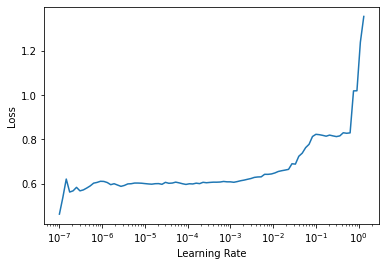

In [24]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.599251,0.606347,0.685015,0.670732,0.691824,01:22
1,0.602216,0.606746,0.704893,0.716263,0.650943,01:21


Better model found at epoch 0 with valid_loss value: 0.6063470244407654.


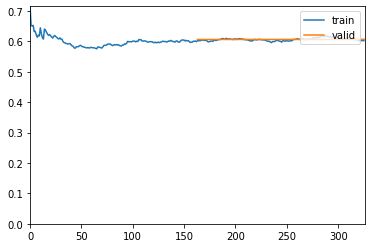

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.600720,0.599436,0.692661,0.685714,0.679245,01:22
1,0.598209,0.598873,0.689602,0.674772,0.698113,01:21
2,0.601103,0.599013,0.711009,0.724739,0.654088,01:22
3,0.597916,0.607302,0.697248,0.667598,0.751572,01:22
4,0.598311,0.600091,0.714067,0.726644,0.660377,01:22


Better model found at epoch 0 with valid_loss value: 0.5994359254837036.


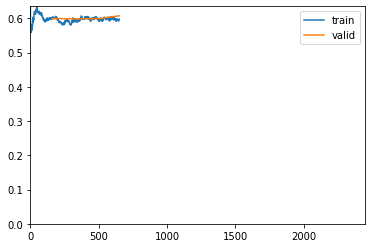

Better model found at epoch 1 with valid_loss value: 0.5988725423812866.
No improvement since epoch 1: early stopping


In [25]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [26]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

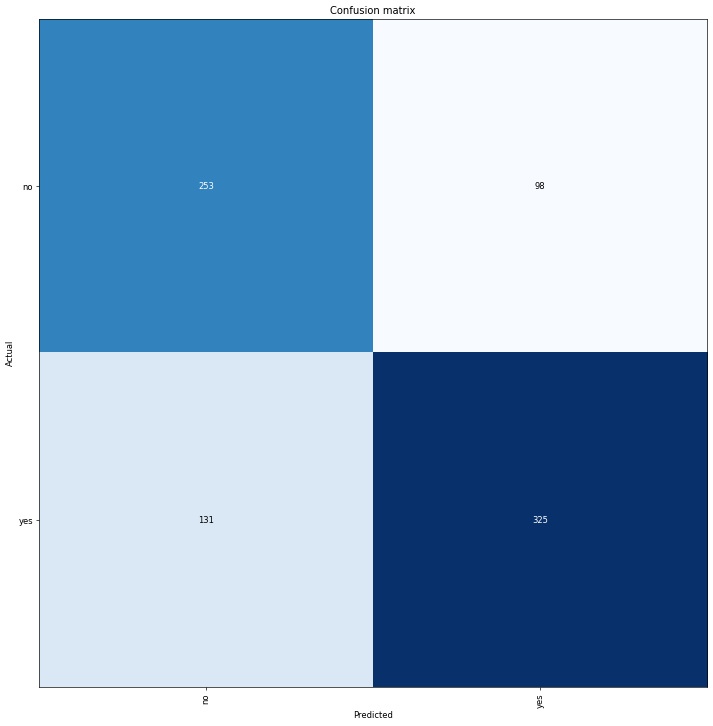

In [27]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [28]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.71623295545578.


(#4) [0.5820542573928833,0.71623295545578,0.7683215130023641,0.7127192982456141]

## MixUp

In [29]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [30]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.610513,0.572343,0.701835,0.677233,0.738994,01:22
1,0.632021,0.600553,0.692661,0.742739,0.562893,01:22


Better model found at epoch 0 with valid_loss value: 0.5723432898521423.


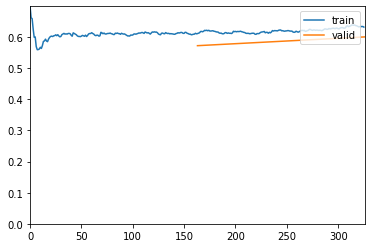

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.619242,0.572873,0.704893,0.700965,0.685535,01:22
1,0.612393,0.570464,0.700306,0.698052,0.676101,01:22
2,0.613273,0.577040,0.709480,0.705128,0.691824,01:21
3,0.616629,0.587685,0.701835,0.768559,0.553459,01:22
4,0.611952,0.577358,0.709480,0.773504,0.569182,01:22


Better model found at epoch 0 with valid_loss value: 0.5728728771209717.


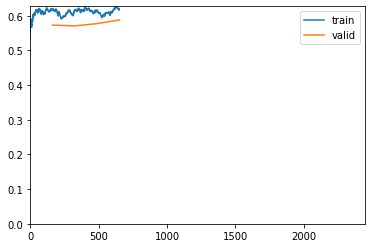

Better model found at epoch 1 with valid_loss value: 0.5704635977745056.
No improvement since epoch 1: early stopping


In [31]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [32]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [33]:
learn.dls = dlsTest

In [34]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7174721360206604.


(#4) [0.5601214170455933,0.7174721360206604,0.7821782178217822,0.6929824561403509]

## Ranger + Flat cosin Anneal

In [35]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.561166,0.570902,0.697248,0.676471,0.723270,01:24
1,0.568401,0.568556,0.701835,0.690402,0.701258,01:24


Better model found at epoch 0 with valid_loss value: 0.5709018707275391.


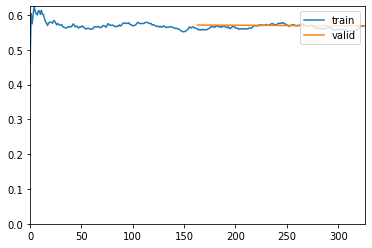

Better model found at epoch 1 with valid_loss value: 0.5685564875602722.


In [36]:
learn.fit_flat_cos(2,lr=1e-3)

In [37]:
learn.unfreeze()

SuggestedLRs(lr_min=4.78630090583465e-07, lr_steep=2.75422871709452e-06)

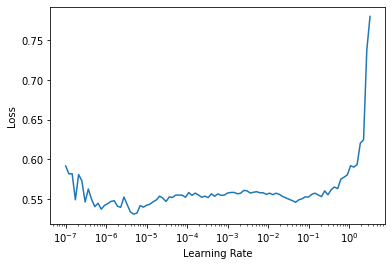

In [38]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.577333,0.568958,0.701835,0.686930,0.710692,01:24
1,0.558797,0.567572,0.701835,0.708475,0.657233,01:24
2,0.563277,0.569901,0.701835,0.688073,0.707547,01:24
3,0.573361,0.567478,0.700306,0.698052,0.676101,01:24
4,0.544180,0.569185,0.706422,0.705882,0.679245,01:24
5,0.570904,0.568721,0.704893,0.710438,0.663522,01:25
6,0.559843,0.568322,0.701835,0.702970,0.669811,01:24


Better model found at epoch 0 with valid_loss value: 0.5689578056335449.


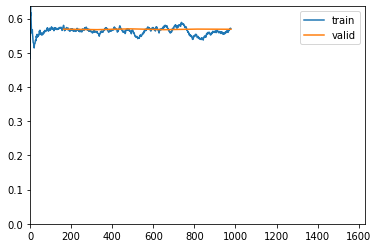

Better model found at epoch 1 with valid_loss value: 0.5675715208053589.
Better model found at epoch 3 with valid_loss value: 0.5674780011177063.
No improvement since epoch 3: early stopping


In [39]:
learn.fit_flat_cos(10,lr=1e-4)

In [40]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [41]:
learn.dls = dlsTest

In [42]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7100371718406677.


(#4) [0.5559272170066833,0.7100371718406677,0.7846153846153846,0.6710526315789473]

## Ranger+Flar Cossin Anneal+LabelSmoothing

In [43]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.594905,0.593124,0.700306,0.693038,0.688679,01:24
1,0.603735,0.593268,0.701835,0.686930,0.710692,01:24


Better model found at epoch 0 with valid_loss value: 0.5931236147880554.


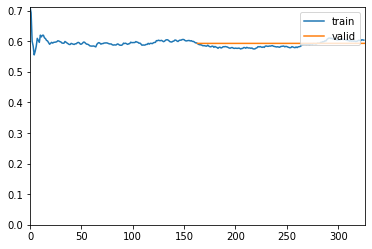

In [44]:
learn.fit_flat_cos(2,lr=1e-3)

In [45]:
learn.unfreeze()

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=9.999999747378752e-06)

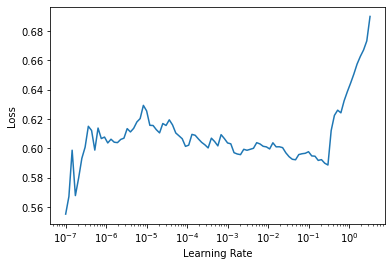

In [46]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.589894,0.591653,0.698777,0.697068,0.672956,01:24
1,0.589097,0.592155,0.697248,0.698675,0.663522,01:24
2,0.578752,0.592708,0.704893,0.695925,0.698113,01:24
3,0.578656,0.592573,0.703364,0.696203,0.691824,01:25


Better model found at epoch 0 with valid_loss value: 0.5916532278060913.


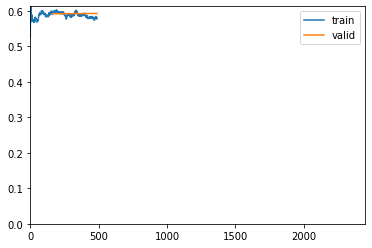

No improvement since epoch 0: early stopping


In [47]:
learn.fit_flat_cos(15,lr=1e-4)

In [48]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [49]:
learn.dls = dlsTest

In [50]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7087979912757874.


(#4) [0.5820331573486328,0.7087979912757874,0.782608695652174,0.6710526315789473]

## Ranger +Flat + Label + MixUp

In [51]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.628713,0.592915,0.703364,0.696203,0.691824,01:25
1,0.634088,0.591159,0.706422,0.707237,0.676101,01:25


Better model found at epoch 0 with valid_loss value: 0.592915415763855.


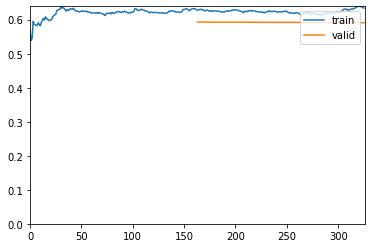

Better model found at epoch 1 with valid_loss value: 0.5911591649055481.


In [52]:
learn.fit_flat_cos(2,lr=1e-3)

In [53]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.616925,0.593463,0.712538,0.725694,0.657233,01:24
1,0.614991,0.593707,0.712538,0.722603,0.663522,01:25
2,0.632100,0.592078,0.701835,0.696486,0.685535,01:25
3,0.621702,0.592654,0.704893,0.698413,0.691824,01:25
4,0.620562,0.591598,0.706422,0.708609,0.672956,01:25
5,0.624081,0.593373,0.714067,0.726644,0.660377,01:24
6,0.627251,0.591792,0.707951,0.715254,0.663522,01:25
7,0.630526,0.592999,0.701835,0.681416,0.726415,01:24


Better model found at epoch 0 with valid_loss value: 0.5934634208679199.


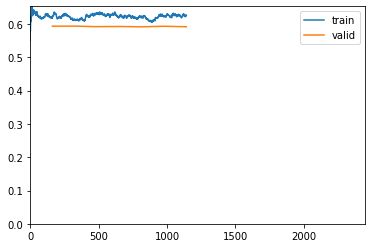

Better model found at epoch 2 with valid_loss value: 0.5920775532722473.
Better model found at epoch 4 with valid_loss value: 0.5915977358818054.
No improvement since epoch 4: early stopping


In [54]:
learn.fit_flat_cos(15,lr=1e-4)

In [55]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [56]:
learn.dls = dlsTest

In [57]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7174721360206604.


(#4) [0.5842062830924988,0.7174721360206604,0.796875,0.6710526315789473]

## Ranger + Flat + MixUp

In [58]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [59]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.606105,0.568867,0.709480,0.720690,0.657233,01:24
1,0.611386,0.565580,0.706422,0.705882,0.679245,01:25


Better model found at epoch 0 with valid_loss value: 0.5688672661781311.


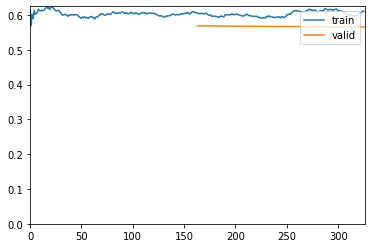

Better model found at epoch 1 with valid_loss value: 0.5655802488327026.


In [60]:
learn.fit_flat_cos(2,lr=1e-3)

In [61]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.612226,0.566262,0.715596,0.721477,0.676101,01:24
1,0.608253,0.565865,0.703364,0.693750,0.698113,01:24
2,0.594893,0.566004,0.706422,0.701923,0.688679,01:24
3,0.599733,0.567872,0.694190,0.669540,0.732704,01:24
4,0.603806,0.567712,0.711009,0.712871,0.679245,01:25


Better model found at epoch 0 with valid_loss value: 0.566262423992157.


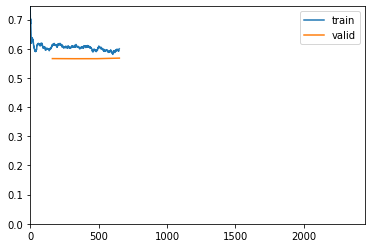

Better model found at epoch 1 with valid_loss value: 0.5658648610115051.
No improvement since epoch 1: early stopping


In [62]:
learn.fit_flat_cos(15,lr=1e-4)

In [63]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [64]:
learn.dls = dlsTest

In [65]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7174721360206604.


(#4) [0.5475785136222839,0.7174721360206604,0.7807881773399015,0.6951754385964912]

## Ranger + MixUp

In [66]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [67]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.621569,0.569169,0.700306,0.681548,0.720126,01:24
1,0.607186,0.567025,0.711009,0.724739,0.654088,01:24


Better model found at epoch 0 with valid_loss value: 0.5691694021224976.


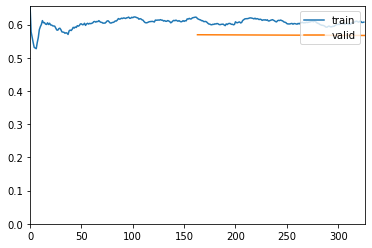

Better model found at epoch 1 with valid_loss value: 0.5670247077941895.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.611212,0.566433,0.706422,0.707237,0.676101,01:24
1,0.591192,0.568439,0.707951,0.718213,0.657233,01:25
2,0.599122,0.567600,0.711009,0.724739,0.654088,01:25
3,0.602611,0.565452,0.711009,0.703470,0.701258,01:24
4,0.601978,0.568151,0.707951,0.702875,0.691824,01:24
5,0.606451,0.567984,0.695719,0.673469,0.726415,01:25
6,0.609622,0.568600,0.714067,0.725086,0.663522,01:24


Better model found at epoch 0 with valid_loss value: 0.566433310508728.


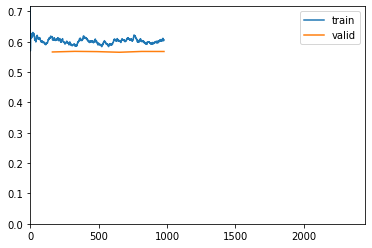

Better model found at epoch 3 with valid_loss value: 0.5654515624046326.
No improvement since epoch 3: early stopping


In [68]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [69]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [70]:
learn.dls = dlsTest

In [71]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.7224287390708923.


(#4) [0.5479204058647156,0.7224287390708923,0.7885572139303483,0.6951754385964912]

## Faltten + MixUp

In [72]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.722500,0.820607,0.507645,0.496491,0.889937,01:22
1,0.701692,0.695102,0.487768,0.485269,0.880503,01:22


Better model found at epoch 0 with valid_loss value: 0.8206073045730591.


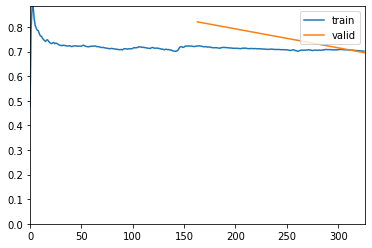

Better model found at epoch 1 with valid_loss value: 0.6951020359992981.


In [73]:
learn.fit_flat_cos(2,lr=1e-3)

In [74]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.691020,0.693922,0.492355,0.486641,0.801887,01:22
1,0.685829,0.703187,0.519878,0.503876,0.817610,01:22
2,0.686988,0.714326,0.522936,0.514706,0.330189,01:22
3,0.686894,0.760930,0.530581,0.521073,0.427673,01:22


Better model found at epoch 0 with valid_loss value: 0.6939224004745483.


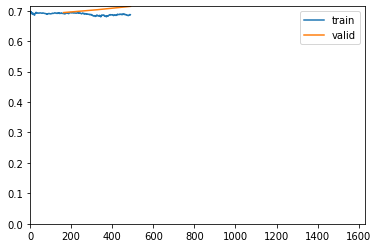

No improvement since epoch 0: early stopping


In [75]:
learn.fit_flat_cos(10,lr=1e-4)

In [76]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [77]:
learn.dls = dlsTest

In [78]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5551425218582153.


(#4) [0.6874958276748657,0.5551425218582153,0.5740458015267176,0.8245614035087719]

## Ranger + Label

In [79]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [80]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.687832,0.693998,0.498471,0.490741,0.833333,01:24
1,0.690527,0.692967,0.500000,0.490722,0.748428,01:25


Better model found at epoch 0 with valid_loss value: 0.6939982175827026.


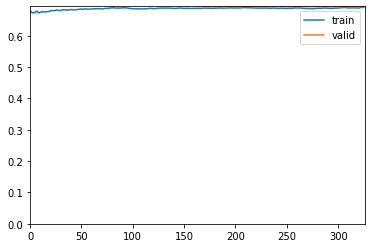

Better model found at epoch 1 with valid_loss value: 0.6929671764373779.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.688643,0.692815,0.503058,0.492375,0.710692,01:25
1,0.687927,0.693104,0.500000,0.490605,0.738994,01:25
2,0.687515,0.693811,0.500000,0.491124,0.783019,01:25
3,0.690024,0.693159,0.501529,0.491870,0.761006,01:25


Better model found at epoch 0 with valid_loss value: 0.6928145289421082.


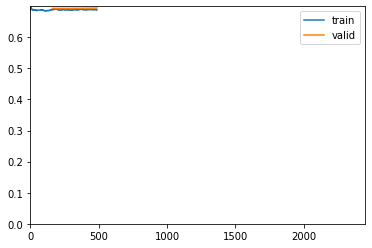

No improvement since epoch 0: early stopping


In [81]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [82]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [83]:
learn.dls = dlsTest

In [84]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5749689936637878.


(#4) [0.6868177056312561,0.5749689936637878,0.5930807248764415,0.7894736842105263]

## Faltten + Label

In [85]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.700594,0.783531,0.521407,0.527473,0.150943,01:22
1,0.706630,0.692969,0.513761,0.500000,0.053459,01:22


Better model found at epoch 0 with valid_loss value: 0.783530592918396.


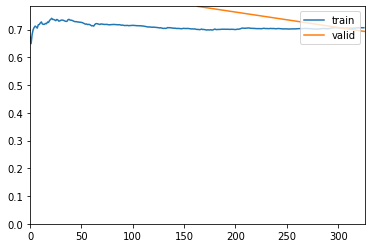

Better model found at epoch 1 with valid_loss value: 0.6929686665534973.


In [86]:
learn.fit_flat_cos(2,lr=1e-3)

In [87]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=1.5848932266235352)

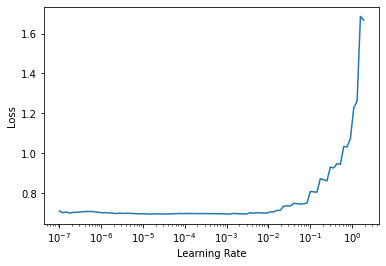

In [88]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.696851,0.695817,0.490826,0.487805,0.943396,01:22
1,0.693005,0.698451,0.490826,0.487725,0.937107,01:22
2,0.694158,0.695857,0.487768,0.486224,0.943396,01:23
3,0.693960,0.691861,0.507645,0.495781,0.738994,01:23
4,0.688709,0.695753,0.522936,0.505576,0.855346,01:23
5,0.688944,0.698523,0.518349,0.502890,0.820755,01:23
6,0.689067,0.698721,0.495413,0.488848,0.827044,01:23


Better model found at epoch 0 with valid_loss value: 0.6958169341087341.


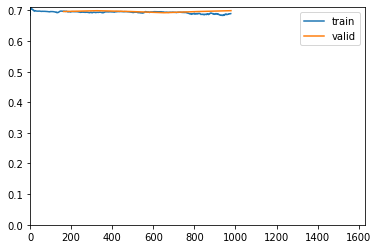

Better model found at epoch 3 with valid_loss value: 0.691861093044281.
No improvement since epoch 3: early stopping


In [89]:
learn.fit_flat_cos(10,lr=1e-4)

In [90]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [91]:
learn.dls = dlsTest

In [92]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5824039578437805.


(#4) [0.6901196241378784,0.5824039578437805,0.6013628620102215,0.7741228070175439]

## Label + MixUp

In [93]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692015,0.690836,0.530581,0.515850,0.562893,01:22
1,0.690421,0.694300,0.503058,0.494017,0.908805,01:22


Better model found at epoch 0 with valid_loss value: 0.6908355951309204.


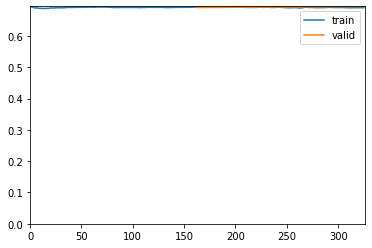

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.690073,0.691250,0.516820,0.502119,0.745283,01:22
1,0.689827,0.690847,0.518349,0.503171,0.748428,01:22
2,0.689858,0.692335,0.522936,0.506148,0.776730,01:25
3,0.688238,0.698077,0.506116,0.494647,0.726415,01:26
4,0.686452,0.698086,0.510703,0.498175,0.858491,01:23


Better model found at epoch 0 with valid_loss value: 0.6912497878074646.


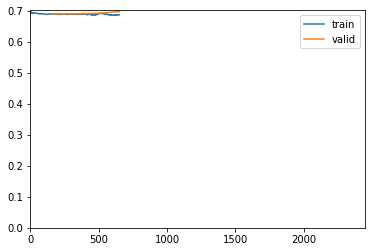

Better model found at epoch 1 with valid_loss value: 0.6908469200134277.
No improvement since epoch 1: early stopping


In [94]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [95]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [96]:
learn.dls = dlsTest

In [97]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6034696698188782.


(#4) [0.6848701238632202,0.6034696698188782,0.6140939597315436,0.8026315789473685]